### Coursera Capstone Project
# The Battle of Neighborhoods -Final (Week 01 and 02)

## Content:

### Week 1
- Introduction of the business problem and who would be interested in this project.
- Data to solve the problem and the source of the data.

### Week 2
- Methodology section to represent the main component of the report. 
- Discussion section to include observations and recommendations based on the results.
- Conclusion section.

#### Let's import all required libraries prior to data analysis and neighborhood research

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
import requests
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

### 1. Introduction of the business problem and who would be interested in this project
###    1.1 Description of the Problem and Background

I am a Data Analyst from Canada. It's a world-known fact that Canada, as well as US, is a land of immigrants from all over the world. 
Before arriving in Canada, the immigrant should prove he/she will be independent in the settlement and know what to do and where to start his/her family life 
in the new country. Being a Data Analyst, I am contacted by different people who ask about pre-arrival support which helps them to settle in absolutely new city.
Knowing the city will make it easy for immigrants to adapt and settle successfully. Mostly they are interested in choosing the best area 
to live with the family based on the following factors: 

- the residential area far from Downtown
- 3 bedroom condo (for a stardard family of 2 adults and 2 kids)
- rent price in the limit of 1000-1200 CAD
- school availability in the area (high schools, university as an example)
- walking distance to other desirable places such as restaurants, cinemas, liquor stores, gyms, close distance to any of the food stores etc.


Having in mind statistical data that Manitoba is the most popular destination of Canada and open province for Oversees Immigration Programs, let's assume that a potential immigrant
would like to live in the capital city of the province -Winnipeg (705,000 population). The second big city of Manitoba has 50,000 of residence, so I would limit my research on
the biggest city which can give more opportunities for the newcomers.

### 1.2 Who could be interested in the research

According to Citizenship and Immigration office, hundred thousands of people from Europe, Asia, and other areas migrate to Canada each year. 
This research could be applicable to anyone interested in starting their life in a new country (potentially, any new place). 
It can help any immigrant to prepare a part of the settlement plan without actually being in a country which is a thousand miles from their original place.
With reference to the provided map, the case becomes the more visualized basis for making a decision about a new home far from home.

### 2. Data to solve the problem and the source of the data


As it has been stated above, the following data is required for the area research:


  - Areas/neighborhoods of the city
  - List of condos/houses for rent in the desired price range and other valuable details
  - List of schools split by type of schools (high, university etc. as an example)
  - Analysis of the eating, shopping facilities based on geographic coordinates of neighborhood venues (cinema, cafes or restaurant, sports places)
    Clusters might be proposed (if required) to focus on area strengths.
    
Foursquare API will be used for venues nearby (schools,shopping centers, entertaining zones)

The city areas will be provided in the report based on Wikipedia:
https://en.wikipedia.org/wiki/Subdivisions_of_Winnipeg

Rental listing will be consolidated from local agencies websites to csv and geo data will be added by means of Foursquare:
https://www.rentfaster.ca
https://winnipeg.rentspot.com & others 
    
The data will answer the questions and illustrate the advantages of a new location for family settlement.
The map will be attached to the presentation as well.

### 3. Methodology

The geodata and coordinates will be extracted from Foursquare (the school venues, eating, and shopping places) to determine the most appropriate area to choose.
Foursquare API will be used also for mapping the locations of rental condos and other required venues. Rental addresses will be converted to geo data using Geopy-distance and local rental website.
The content-based technique is going to be implemented to solve the problem and give recommendations.

Combining with FourSquare, a matrix could be built to capture characteristic of venues nearby and be applied to the required areas for proving the 
recommendations to the interested audience.
To start the research, the data should be cleaned and carefully prepared for analysis.

###  3.1 Data preparation

In [2]:
address = 'Winnipeg, MB'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Winnipeg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Winnipeg are 49.884017, -97.168579.


In [3]:
City_latitude=49.884017
City_longitude=-97.168579

In [4]:
CLIENT_ID = 'GEZLHIJ2YB4D1NGDCO1HZFACXEYBGSJDT0XVIBQHB3BGNVA5' # my Foursquare ID
CLIENT_SECRET = 'RGHRH0W2NGAHN55HGB1E05ZRS0IIJNF2LIWO2VN4JX1AR3PA' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: GEZLHIJ2YB4D1NGDCO1HZFACXEYBGSJDT0XVIBQHB3BGNVA5
CLIENT_SECRET:RGHRH0W2NGAHN55HGB1E05ZRS0IIJNF2LIWO2VN4JX1AR3PA


In [5]:
LIMIT=500
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    City_latitude, 
    City_longitude, 
    radius
)
url 


'https://api.foursquare.com/v2/venues/explore?&client_id=GEZLHIJ2YB4D1NGDCO1HZFACXEYBGSJDT0XVIBQHB3BGNVA5&client_secret=RGHRH0W2NGAHN55HGB1E05ZRS0IIJNF2LIWO2VN4JX1AR3PA&v=20180605&ll=49.884017,-97.168579&radius=1000'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d4f11b2ad17890039692e53'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wolseley',
  'headerFullLocation': 'Wolseley, Winnipeg',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 35,
  'suggestedBounds': {'ne': {'lat': 49.89301700900001,
    'lng': -97.15463721926234},
   'sw': {'lat': 49.87501699099999, 'lng': -97.18252078073765}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b54e2f4f964a52065d127e3',
       'name': "De Luca's Specailty Foods",
       'location': {'address': '956 Portage Ave.',
        'lat': 49.884593859570344,
        'lng': -97.17322738012113,
        'labeledLatLngs': [{'label': 'display',
          '

In [7]:
def get_category_type(row):	
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None	
    else:
        return categories_list[0]['name']

In [8]:
venues = results['response']['groups'][0]['items']
    
Winnipeg_venues = json_normalize(venues) 
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
Winnipeg_venues =Winnipeg_venues.loc[:, filtered_columns]
# filter the category for each row
Winnipeg_venues['venue.categories'] = Winnipeg_venues.apply(get_category_type, axis=1)
# clean columns
Winnipeg_venues.columns = [col.split(".")[-1] for col in Winnipeg_venues.columns]

Winnipeg_venues.head()

Winnipeg_venues.shape

(30, 4)

In [9]:
print('{} venues were returned by Foursquare.'.format(Winnipeg_venues.shape[0]))

30 venues were returned by Foursquare.


In [10]:
map_Winnipeg = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(Winnipeg_venues['lat'], Winnipeg_venues['lng'], Winnipeg_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_Winnipeg)  
    
map_Winnipeg

In [11]:
Winnipeg_venues.head(10)

,name,categories,lat,lng
0,De Luca's Specailty Foods,Grocery Store,49.884594,-97.173227
1,Vimy Ridge Park,Park,49.884460,-97.168101
2,Thom Bargen,Café,49.880807,-97.159700
3,Boon Burger Cafe,Vegetarian / Vegan Restaurant,49.881129,-97.159562
4,The Tallest Poppy,Diner,49.881979,-97.159522
5,529 Wellington Steakhouse,Steakhouse,49.876551,-97.161614
6,Tall Grass Prairie Bread Company,Bakery,49.881553,-97.168835
7,Bistro Dansk Restaurant,Modern European Restaurant,49.880599,-97.159482
8,Stella's Café and Bakery,Café,49.882286,-97.159726
9,Café Ce Soir,French Restaurant,49.885073,-97.172695


### 3.2 Data Mapping and Neighborhoods Analysis

In [12]:
!wget -q -O 'City.csv' https://www.dropbox.com/s/rm61fk9wyzgospt/City.csv?dl=0
print('Data downloaded!')

Data downloaded!


In [13]:
neighborhoods = pd.read_csv('City.csv')
neighborhoods.head(11)


,Borough,Neighborhood,Latitude,Longitude
0,Winnipeg,Assiniboine South,49.870759,-97.234721
1,Winnipeg,Downtown,49.894557,-97.140109
2,Winnipeg,Fort Garry,49.888984,-97.134289
3,Winnipeg,Inkster,49.953411,-97.200944
4,Winnipeg,Point Douglas,49.903370,-97.116020
5,Winnipeg,River East,49.844651,-97.178063
6,Winnipeg,River Heights,49.844651,-97.178063
7,Winnipeg,St.Boniface,49.858513,-97.071372
8,Winnipeg,St.James-Assiniboia,49.893583,-97.266200
9,Winnipeg,St.Vital,49.823758,-97.099641


In [14]:
Wng = neighborhoods[neighborhoods['Borough'] == 'Winnipeg'].reset_index(drop=True)
Wng.head(12)


,Borough,Neighborhood,Latitude,Longitude
0,Winnipeg,Assiniboine South,49.870759,-97.234721
1,Winnipeg,Downtown,49.894557,-97.140109
2,Winnipeg,Fort Garry,49.888984,-97.134289
3,Winnipeg,Inkster,49.953411,-97.200944
4,Winnipeg,Point Douglas,49.903370,-97.116020
5,Winnipeg,River East,49.844651,-97.178063
6,Winnipeg,River Heights,49.844651,-97.178063
7,Winnipeg,St.Boniface,49.858513,-97.071372
8,Winnipeg,St.James-Assiniboia,49.893583,-97.266200
9,Winnipeg,St.Vital,49.823758,-97.099641


In [15]:
address = 'St.Vital, Winnipeg'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of St.Vital are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of St.Vital are 49.8237577, -97.0996409.


In [16]:
map_Wng = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(Wng['Latitude'], Wng['Longitude'], Wng['Neighborhood']):	
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Wng)  
map_Wng


In [17]:
Wng.loc[9, 'Neighborhood']

neighborhood_latitude = Wng.loc[9, 'Latitude'] 
neighborhood_longitude = Wng.loc[9, 'Longitude'] 
neighborhood_name = Wng.loc[9, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of St.Vital are 49.8237577, -97.09964090000001.


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,categories=''):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
                            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
Wng_venues = getNearbyVenues(names=Wng['Neighborhood'],
                                   latitudes=Wng['Latitude'],
                                   longitudes=Wng['Longitude']
                                  )

Assiniboine South
Downtown
Fort Garry
Inkster
Point Douglas
River East
River Heights
St.Boniface
St.James-Assiniboia
St.Vital
Seven Oaks


In [20]:
print(Wng_venues.shape)
Wng_venues.head()


(162, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Assiniboine South,49.870759,-97.234721,Assiniboine Park Zoo,49.869900,-97.239498,Zoo
1,Assiniboine South,49.870759,-97.234721,Assiniboine Park Duck Pond,49.873476,-97.232006,Other Great Outdoors
2,Assiniboine South,49.870759,-97.234721,Leo Mol Sculpture Garden,49.874738,-97.236202,Garden
3,Assiniboine South,49.870759,-97.234721,International Polar Bear Conservation Centre a...,49.873436,-97.238578,Exhibit
4,Assiniboine South,49.870759,-97.234721,The Park Café,49.873263,-97.233453,Café


In [21]:
Wng_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Assiniboine South,11,11,11,11,11,11
Downtown,54,54,54,54,54,54
Fort Garry,54,54,54,54,54,54
Inkster,1,1,1,1,1,1
Point Douglas,6,6,6,6,6,6
River East,6,6,6,6,6,6
River Heights,6,6,6,6,6,6
Seven Oaks,7,7,7,7,7,7
St.Boniface,14,14,14,14,14,14


In [22]:
print('There are {} uniques categories.'.format(len(Wng_venues['Venue Category'].unique())))

There are 83 uniques categories.


#### Analyze each separate neighborhood

In [23]:
Wng_onehot = pd.get_dummies(Wng_venues[['Venue Category']], prefix="", prefix_sep="")
Wng_onehot['Neighborhood'] = Wng_venues['Neighborhood'] 

cols=list(Wng_onehot.columns.values)
cols.pop(cols.index('Neighborhood'))
Wng_onehot=Wng_onehot[['Neighborhood']+cols]

# rename Neighborhood for Neighbourhood so that future merge works
Wng_onehot.rename(columns = {'Neighborhood': 'Neighbourhood'}, inplace = True)
Wng_onehot.head()

,Neighbourhood,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Bakery,Baseball Stadium,Bookstore,Brazilian Restaurant,Breakfast Spot,Burger Joint,Bus Station,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Dance Studio,Discount Store,Dive Bar,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant,Fried Chicken Joint,Gaming Cafe,Garden,Gay Bar,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Korean Restaurant,Liquor Store,Lounge,Market,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Museum,Nightclub,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pub,Recreation Center,Rental Car Location,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Smoothie Shop,Snack Place,South American Restaurant,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Thai Restaurant,Toy / Game Store,Trail,Train Station,Vietnamese Restaurant,Zoo
0,Assiniboine South,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Assiniboine South,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Assiniboine South,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Assiniboine South,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Assiniboine South,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
Wng_grouped = Wng_onehot.groupby('Neighbourhood').mean().reset_index()
Wng_grouped

Wng_grouped.shape


(11, 84)

#### Top 5 most common venues for each neighborhood

In [25]:
num_top_venues = 5

for hood in Wng_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Wng_grouped[Wng_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Assiniboine South----
                  venue  freq
0                Garden  0.27
1            Playground  0.18
2               Exhibit  0.09
3  Other Great Outdoors  0.09
4           Snack Place  0.09


----Downtown----
            venue  freq
0     Coffee Shop  0.07
1           Hotel  0.06
2      Restaurant  0.06
3       Nightclub  0.04
4  Sandwich Place  0.04


----Fort Garry----
               venue  freq
0              Hotel  0.07
1     Breakfast Spot  0.06
2         Restaurant  0.06
3  Indian Restaurant  0.06
4        Coffee Shop  0.06


----Inkster----
                 venue  freq
0     Business Service   1.0
1  American Restaurant   0.0
2          Pizza Place   0.0
3             Pharmacy   0.0
4            Pet Store   0.0


----Point Douglas----
                        venue  freq
0  Construction & Landscaping  0.33
1                    Dive Bar  0.17
2                       Trail  0.17
3                        Park  0.17
4          Chinese Restaurant  0.17


----River East

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Wng_grouped['Neighbourhood']

for ind in np.arange(Wng_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Wng_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Assiniboine South,Garden,Playground,Snack Place,Exhibit,Other Great Outdoors,Café,Zoo,Train Station,Baseball Stadium,French Restaurant
1,Downtown,Coffee Shop,Restaurant,Hotel,Nightclub,Pizza Place,Asian Restaurant,Concert Hall,Café,Sandwich Place,Caribbean Restaurant
2,Fort Garry,Hotel,Breakfast Spot,Coffee Shop,Indian Restaurant,Restaurant,Market,Burger Joint,Italian Restaurant,Spa,Museum
3,Inkster,Business Service,Zoo,Fried Chicken Joint,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant
4,Point Douglas,Construction & Landscaping,Trail,Park,Chinese Restaurant,Dive Bar,Zoo,French Restaurant,Exhibit,Falafel Restaurant,Fast Food Restaurant
5,River East,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
6,River Heights,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
7,Seven Oaks,Pet Store,Ice Cream Shop,Bakery,Falafel Restaurant,Fast Food Restaurant,Liquor Store,Grocery Store,Zoo,Fried Chicken Joint,Exhibit
8,St.Boniface,Fast Food Restaurant,Pizza Place,Liquor Store,Pharmacy,Park,Coffee Shop,Mobile Phone Shop,Sandwich Place,Discount Store,Pet Store
9,St.James-Assiniboia,Dance Studio,Bus Station,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant,Fried Chicken Joint


### 3.3 Machine-Learning technique: Data Clustering

In [28]:
from sklearn.cluster import KMeans
kclusters = 5
Wng_grouped_clustering = Wng_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Wng_grouped_clustering)
kmeans.labels_[0:10] 

array([1, 1, 1, 3, 4, 1, 1, 1, 1, 0], dtype=int32)

In [29]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Wng_merged = Wng
Wng_merged = Wng_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

Wng_merged.head(100)




,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Winnipeg,Assiniboine South,49.870759,-97.234721,1,Garden,Playground,Snack Place,Exhibit,Other Great Outdoors,Café,Zoo,Train Station,Baseball Stadium,French Restaurant
1,Winnipeg,Downtown,49.894557,-97.140109,1,Coffee Shop,Restaurant,Hotel,Nightclub,Pizza Place,Asian Restaurant,Concert Hall,Café,Sandwich Place,Caribbean Restaurant
2,Winnipeg,Fort Garry,49.888984,-97.134289,1,Hotel,Breakfast Spot,Coffee Shop,Indian Restaurant,Restaurant,Market,Burger Joint,Italian Restaurant,Spa,Museum
3,Winnipeg,Inkster,49.953411,-97.200944,3,Business Service,Zoo,Fried Chicken Joint,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant
4,Winnipeg,Point Douglas,49.903370,-97.116020,4,Construction & Landscaping,Trail,Park,Chinese Restaurant,Dive Bar,Zoo,French Restaurant,Exhibit,Falafel Restaurant,Fast Food Restaurant
5,Winnipeg,River East,49.844651,-97.178063,1,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
6,Winnipeg,River Heights,49.844651,-97.178063,1,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
7,Winnipeg,St.Boniface,49.858513,-97.071372,1,Fast Food Restaurant,Pizza Place,Liquor Store,Pharmacy,Park,Coffee Shop,Mobile Phone Shop,Sandwich Place,Discount Store,Pet Store
8,Winnipeg,St.James-Assiniboia,49.893583,-97.266200,0,Dance Studio,Bus Station,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant,Fried Chicken Joint
9,Winnipeg,St.Vital,49.823758,-97.099641,2,Recreation Center,Zoo,Fried Chicken Joint,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant


In [30]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []

for lat, lon, poi, cluster in zip(Wng_merged['Latitude'], Wng_merged['Longitude'], Wng_merged['Neighborhood'], Wng_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



Lets' examine the city Clusters


In [31]:
# Cluster 1
Wng_merged.loc[Wng_merged['Cluster Labels'] == 0, Wng_merged.columns[[1] + list(range(5, Wng_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,St.James-Assiniboia,Dance Studio,Bus Station,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant,Fried Chicken Joint


In [32]:
# Cluster 2
Wng_merged.loc[Wng_merged['Cluster Labels'] == 1, Wng_merged.columns[[1] + list(range(5, Wng_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Assiniboine South,Garden,Playground,Snack Place,Exhibit,Other Great Outdoors,Café,Zoo,Train Station,Baseball Stadium,French Restaurant
1,Downtown,Coffee Shop,Restaurant,Hotel,Nightclub,Pizza Place,Asian Restaurant,Concert Hall,Café,Sandwich Place,Caribbean Restaurant
2,Fort Garry,Hotel,Breakfast Spot,Coffee Shop,Indian Restaurant,Restaurant,Market,Burger Joint,Italian Restaurant,Spa,Museum
5,River East,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
6,River Heights,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
7,St.Boniface,Fast Food Restaurant,Pizza Place,Liquor Store,Pharmacy,Park,Coffee Shop,Mobile Phone Shop,Sandwich Place,Discount Store,Pet Store
10,Seven Oaks,Pet Store,Ice Cream Shop,Bakery,Falafel Restaurant,Fast Food Restaurant,Liquor Store,Grocery Store,Zoo,Fried Chicken Joint,Exhibit


In [33]:
# Cluster 3
Wng_merged.loc[Wng_merged['Cluster Labels'] == 2, Wng_merged.columns[[1] + list(range(5, Wng_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,St.Vital,Recreation Center,Zoo,Fried Chicken Joint,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant


In [34]:
# Cluster 4
Wng_merged.loc[Wng_merged['Cluster Labels'] == 3, Wng_merged.columns[[1] + list(range(5, Wng_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inkster,Business Service,Zoo,Fried Chicken Joint,Donut Shop,Exhibit,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food Court,French Restaurant


In [35]:
# Cluster 5
Wng_merged.loc[Wng_merged['Cluster Labels'] == 4, Wng_merged.columns[[1] + list(range(5, Wng_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Point Douglas,Construction & Landscaping,Trail,Park,Chinese Restaurant,Dive Bar,Zoo,French Restaurant,Exhibit,Falafel Restaurant,Fast Food Restaurant


In [36]:
latitude= 49.8237577
longitude= -97.0996409

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Wng_merged['Latitude'], Wng_merged['Longitude'], Wng_merged['Neighborhood'], Wng_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
 
for lat, lng, label in zip(Wng['Latitude'], Wng['Longitude'], Wng['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters



After additional research, I suggest to pay precise attention on cluster #2 to cover most of the audience demands.
It's required to find residential area, so Downtown will be not in our scope.

In [37]:
# Cluster 2
kk = 1
Wng_merged.loc[Wng_merged['Cluster Labels'] == kk, Wng_merged.columns[[1] + list(range(5, Wng_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Assiniboine South,Garden,Playground,Snack Place,Exhibit,Other Great Outdoors,Café,Zoo,Train Station,Baseball Stadium,French Restaurant
1,Downtown,Coffee Shop,Restaurant,Hotel,Nightclub,Pizza Place,Asian Restaurant,Concert Hall,Café,Sandwich Place,Caribbean Restaurant
2,Fort Garry,Hotel,Breakfast Spot,Coffee Shop,Indian Restaurant,Restaurant,Market,Burger Joint,Italian Restaurant,Spa,Museum
5,River East,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
6,River Heights,Sandwich Place,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Breakfast Spot,Business Service,Zoo,Exhibit,Falafel Restaurant,Fish & Chips Shop
7,St.Boniface,Fast Food Restaurant,Pizza Place,Liquor Store,Pharmacy,Park,Coffee Shop,Mobile Phone Shop,Sandwich Place,Discount Store,Pet Store
10,Seven Oaks,Pet Store,Ice Cream Shop,Bakery,Falafel Restaurant,Fast Food Restaurant,Liquor Store,Grocery Store,Zoo,Fried Chicken Joint,Exhibit


### 4. Execution and Discussion

### 4.1 Execution and Observations


To choose a condo for rent, let's make some analysis of the area proposals. Using the general statistic of the Apartment rental listings of the city, https://www.rentboard.ca/rentals/rental_rates.aspx?locid=1523,
the price of 3-bedroom condos ranges from $1,124 to $4,200 CAD where the average one is $1,731 CAD. I will use rent listing from different local agenciies and
rent browsers as https://www.rentfaster.ca, https://winnipeg.rentspot.com and others
Then, to prepare the data for map visualization, I worked with Nominatim to get latitude and longitude of the rental listing.
The outcome has been saved for making the process simplier as csv for the next steps:

In [38]:
!wget -q -O 'BR_Rent.csv' https://www.dropbox.com/s/c774539badhd8a8/BR_Rent.csv?dl=0
print('Data downloaded!')

Data downloaded!


In [39]:
Condos = pd.read_csv('BR_Rent.csv')
Condos.head(7)

,Borough,Address,Area,Type,# Beds,# Baths,Price,Latitude,Longitude
0,Winnipeg,395 River Ave.,Downtown,Condo,3,1.0,825,49.880193,-97.144291
1,Winnipeg,831 Flora Avenue,Northwest,Condo,3,1.0,1070,49.917812,-97.154484
2,Winnipeg,829 Flora Avenue,Northwest,Condo,3,1.0,1070,49.917812,-97.154484
3,Winnipeg,738 Scotland Avenue,Earl Grey,Condo,3,1.0,1529,49.861943,-97.159401
4,Winnipeg,20 El tassi Drive,Peguis,Condo,3,1.0,1500,49.903850,-97.055352
5,Winnipeg,3015 Mandalay,Mandalay West,Condo,3,1.0,1124,49.957970,-97.189426
6,Winnipeg,825 Sterling Lyon,Tuxedo,Condo,3,2.5,4200,49.842748,-97.194516


Let's vizaulize the apartment price statistics by means of seaborn to track the distribution of prices:

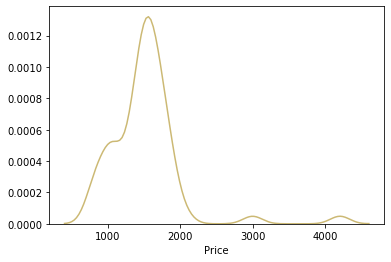

In [73]:
import seaborn as sns
sns.set_color_codes()
sns.distplot(Condos['Price'], hist=False, kde=True, color="y")


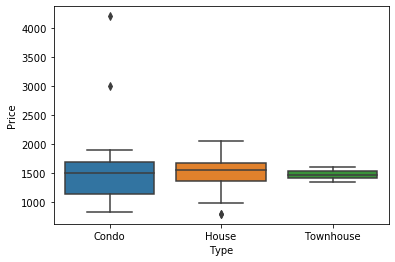

In [41]:
sns.boxplot(x='Type', y= 'Price', data=Condos)

Analyzing around 100 rentals, we can confirm the statistic that the price varies from $1200-1700 CAD and type of the accommodation doesn't impact the price in the city
when the client searches for a 3-Bedroom place. 1BR or 2BR are showing different trends.

In [42]:
# create a map with the listing to track the best area for 3-BR housing offers.
City_latitude=49.884017
City_longitude=-97.168579

map_city_rentals = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Condos['Latitude'], Condos['Longitude'],'$ ' + Condos['Price'].astype(str)+ ',  '+ Condos['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city_rentals) 
    

map_city_rentals


In [43]:
# create map to combine the cluster and rentals
City_latitude=49.884017
City_longitude=-97.168579

kclusters=5
map_Rentals_plus_Clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Wng_merged['Latitude'], Wng_merged['Longitude'], Wng_merged['Neighborhood'], Wng_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_Rentals_plus_Clusters)

# add markers to map for rental places
for lat, lng, label in zip(Condos['Latitude'], Condos['Longitude'],'$ ' + Condos['Price'].astype(str)+ ',  '+ Condos['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Rentals_plus_Clusters) 
    
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_city_rentals.add_child(MeasureControl())


map_Rentals_plus_Clusters

Before choosing the definite place, to meet the requirements, let's review the area: 
- What are the options for school?
- Are there any bus stops nearby?
- Where could the shopping be done?

In [44]:
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Localidad', 
                  'Localidad Latitude', 
                  'Localidad Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                 'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

Check options for Schools or Universities
(nursey or private schools can be picked up as well by provided category code below)

In [45]:
Schools= getNearbyVenues(names=Condos['Address'], latitudes=Condos['Latitude'], longitudes=Condos['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d13d941735')
Schools.head()

,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,395 River Ave.,49.880193,-97.144291,Westgate Mennonite Collegiate,49.876601,-97.158502,High School
1,831 Flora Avenue,49.917812,-97.154484,Children of the Earth High School,49.913223,-97.142980,High School
2,829 Flora Avenue,49.917812,-97.154484,Children of the Earth High School,49.913223,-97.142980,High School
3,738 Scotland Avenue,49.861943,-97.159401,Grant Park High School,49.856108,-97.170038,High School
4,738 Scotland Avenue,49.861943,-97.159401,Kelvin High School,49.873051,-97.167169,High School


In [47]:
Schools.shape

(85, 7)

In [49]:
Universities= getNearbyVenues(names=Condos['Address'], latitudes=Condos['Latitude'], longitudes=Condos['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d1ae941735')
Universities.head()

,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,831 Flora Avenue,49.917812,-97.154484,University of Winnipeg — Department of Urban a...,49.916270,-97.145813,College Academic Building
1,831 Flora Avenue,49.917812,-97.154484,University Of Manitoba - Facult Of Social Work,49.916103,-97.144598,University
2,829 Flora Avenue,49.917812,-97.154484,University of Winnipeg — Department of Urban a...,49.916270,-97.145813,College Academic Building
3,829 Flora Avenue,49.917812,-97.154484,University Of Manitoba - Facult Of Social Work,49.916103,-97.144598,University
4,499 Victor Street,49.896315,-97.162872,University of Manitoba - Apotex Centre,49.903594,-97.161254,University


In [50]:
Universities.shape

(56, 7)

In [80]:
Nursery_schools= getNearbyVenues(names=Condos['Address'], latitudes=Condos['Latitude'], longitudes=Condos['Longitude'], radius=1000, categoryIds='4f4533814b9074f6e4fb0107')
Nursery_schools.tail()

,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,149 Pilgrim ave,49.863125,-97.102943,Montessori Preschool,49.869530,-97.109929,Nursery School
7,110 McMasters Road,49.798682,-97.146161,1619 Pembina Hwy,49.807867,-97.155007,Nursery School
8,84 Snow St,49.808332,-97.150876,1619 Pembina Hwy,49.807867,-97.155007,Nursery School
9,391 Balmoral St,49.896667,-97.152261,Knox Day Nursery,49.895900,-97.149360,Nursery School
10,1132 Markham Road,49.809099,-97.153617,1619 Pembina Hwy,49.807867,-97.155007,Nursery School


Check places for shopping, transport availability etc.

In [53]:
Shops= getNearbyVenues(names=Condos['Address'], latitudes=Condos['Latitude'], longitudes=Condos['Longitude'], radius=1000, categoryIds='4d4b7105d754a06378d81259')
Shops.head()

,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,395 River Ave.,49.880193,-97.144291,Shoppers Drug Mart,49.879925,-97.147230,Pharmacy
1,395 River Ave.,49.880193,-97.144291,Circle K,49.879977,-97.146634,Convenience Store
2,395 River Ave.,49.880193,-97.144291,Liquor Mart,49.879337,-97.147098,Liquor Store
3,395 River Ave.,49.880193,-97.144291,Safeway,49.879341,-97.147864,Grocery Store
4,395 River Ave.,49.880193,-97.144291,Main Street Manitoba Public Insurance,49.887833,-97.134210,Miscellaneous Shop


In [54]:
Bus_stop= getNearbyVenues(names=Condos['Address'], latitudes=Condos['Latitude'], longitudes=Condos['Longitude'], radius=1000, categoryIds='52f2ab2ebcbc57f1066b8b4f')
Bus_stop.head()

,Localidad,Localidad Latitude,Localidad Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,395 River Ave.,49.880193,-97.144291,Winnipeg Transit Bus Stop #10172,49.879156,-97.146613,Bus Stop
1,395 River Ave.,49.880193,-97.144291,Winnipeg Transit Bus Stop #10641,49.889144,-97.135287,Bus Stop
2,395 River Ave.,49.880193,-97.144291,Winnipeg Transit Bus Stop #10068,49.874664,-97.142624,Bus Stop
3,395 River Ave.,49.880193,-97.144291,Winnipeg Transit Bus Stop #10066,49.875192,-97.142397,Bus Stop
4,395 River Ave.,49.880193,-97.144291,Winnipeg Transit Bus Stop #10159,49.883992,-97.132079,Bus Stop


In [56]:
Shops.shape

(1960, 7)

In [57]:
Bus_stop.shape

(111, 7)

In [64]:
# Any other wishes?
# You can check any other categories of venue:
Choose_venue = {
    'Athletics & Sports': '4f4528bc4b90abdf24c9de85',
    'Arts & Entertainment': '4d4b7104d754a06370d81259',
    'Nursery School': '4f4533814b9074f6e4fb0107',
    'Private School': '52e81612bcbc57f1066b7a46',
    'Financial or Legal Service': '503287a291d4c4b30a586d65'
    }    

### 4.2 Recommendations

In [82]:
# Let's create a map to combine the Cluster and Rentals, Schools & Universities
City_latitude=49.884017
City_longitude=-97.168579

kclusters=5
map_Final_Recommendation = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Wng_merged['Latitude'], Wng_merged['Longitude'], Wng_merged['Neighborhood'], Wng_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_Final_Recommendation)
    
# add markers of Schools to map
for lat, lng, label in zip(Schools['Venue Latitude'], Schools['Venue Longitude'],  Schools['Venue'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_Final_Recommendation) 
    
    
# add markers of Nursery Schools to map
for lat, lng, label in zip(Nursery_schools['Venue Latitude'], Nursery_schools['Venue Longitude'], Nursery_schools['Venue'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='yellow',
        fill_color='yellow',
        fill_opacity=2.5,
    ).add_to(map_Final_Recommendation) 

for lat, lng, label in zip(Universities['Venue Latitude'], Universities['Venue Longitude'],  Universities['Venue'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='orange',
        fill_color='orange',
        fill_opacity=2.5,
    ).add_to(map_Final_Recommendation) 
    
    
    # add markers to map for rental places
for lat, lng, label in zip(Condos['Latitude'], Condos['Longitude'],'$ ' + Condos['Price'].astype(str)+ ',  '+ Condos['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Final_Recommendation) 
    
        
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_Final_Recommendation.add_child(MeasureControl())


map_Final_Recommendation

## I would recommend the area of Cluster#2 or #5, far from the Downtown of the city, 3BR condos of NorthWest/Point Douglas areas which are not only in required price range but even beyond expectation (1000-1200 CAD):
### 1. 831 Flora Avenue (1,070 CAD)           
### 2. 201 Powers St (995 CAD)

### Both condos are located not more than 1000 meters from Schools (if a school is located more that 1km from the home, the Area School Division provides a bus transportation for a student). The newcomer can use the bus stations nearby. If they have small childen, the nursery school is in 5-10 min of walking distance. There are 2 Universities in the same area (on Silkirk Ave). The additional research showed the variaty of venues for these condos (shopping, sports etc.) They can be tracked in Cluster #2 and #5 analysis as well.

### 5. Conclusions

THE PROJECT PROBLEM HAS BEEN SOLVED. 
IT WAS A GREAT DATA SCIENCE JOURNEY !! 

The additional conclusions could be found in the Capstone Presentation. 
Thank you for staying with me!